# Number of patients reported to the GGD 
# Aantal bij de GGD gemelde patiënten 
# Dataset 1 from rivm.nl/coronavirus-covid-19/grafieken

In [7]:
#Importing relevant library 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns 
import datetime

In [8]:
# Scrapping the 4 csv data from rivm.nl
request_data=requests.get('https://www.rivm.nl/coronavirus-covid-19/grafieken').text
soup = BeautifulSoup(request_data,'html.parser')
#print(soup.prettify())
my_table=soup.find_all('script', {'type':"application/json"})
my_table=str(my_table)
my_table=my_table.split("csv")

In [9]:
#Data cleaning process 
table_1 = my_table[4]
table_1 = table_1.replace('\\u0022', '')
table_1 = table_1.split("data:")[0]
table_1 = str(table_1).split(']","pre')[0]
table_1 = str(table_1).split("ren],")[1]
table_1 = table_1.replace("]", '')
table_1 = table_1.split("[")

In [10]:
#Setting the data frame 
df1 = pd.DataFrame([sub.split(",") for sub in table_1 ])
df1.drop([3], axis=1, inplace=True)
df1.drop(0,inplace=True)
df1.columns=["day_month","Reported_New_Cases","Reported_Previous_Cases"]

In [11]:
#Changing the numerical columns from string to integer and adding a total column 
df1.Reported_New_Cases = pd.to_numeric(df1.Reported_New_Cases, downcast='integer')
df1.Reported_Previous_Cases = pd.to_numeric(df1.Reported_Previous_Cases, downcast='integer')
df1.loc[:,"Reported_Total_Cases"] = df1.Reported_New_Cases + df1.Reported_Previous_Cases

In [12]:
#Setting the date data to date form for pandas library
df1['Year']= '2020'
df1['date']=df1.day_month+' '+ df1.Year
df1.date=df1.date.str.replace("mrt","mar")
df1.date=df1.date.str.replace("mei","may")
df1.date=pd.to_datetime(df1.date).dt.date
df1.drop(['day_month'], axis=1, inplace=True)
df1.drop(['Year'], axis=1, inplace=True)
df1 = df1[['date', 'Reported_New_Cases', 'Reported_Previous_Cases', 'Reported_Total_Cases']]
#df1=df1.set_index('date')

In [13]:
df1.head()

,date,Reported_New_Cases,Reported_Previous_Cases,Reported_Total_Cases
1,2020-02-27,0,1,1
2,2020-02-28,0,8,8
3,2020-02-29,0,1,1
4,2020-03-01,0,10,10
5,2020-03-02,0,14,14


In [14]:
df1.tail()

,date,Reported_New_Cases,Reported_Previous_Cases,Reported_Total_Cases
135,2020-07-10,0,1,1
136,2020-07-11,0,0,0
137,2020-07-12,0,0,0
138,2020-07-13,0,0,0
139,2020-07-14,0,0,0


In [15]:
df1.Reported_Total_Cases.sum()

11305

In [16]:
#df1.to_csv (r'C:\Users\dell\Desktop\Tableau_Covid19\data_rivm_reported.csv',  index = True, header=True)

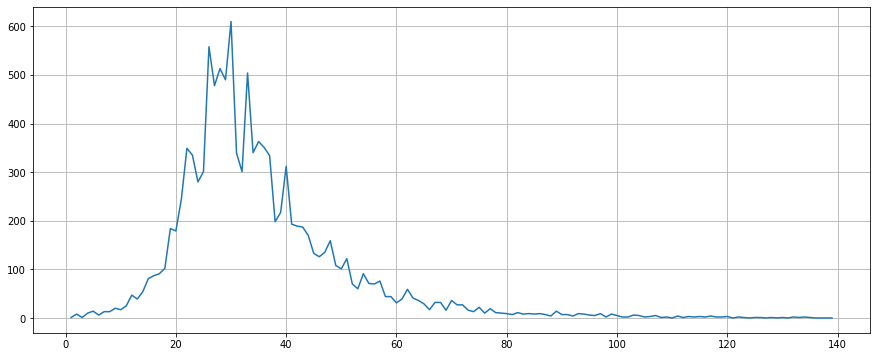

In [17]:
df1.Reported_Total_Cases.plot(kind='line', x='date', y='Reported_Total_Cases', grid=True, figsize=(15,6))

(array([737485., 737516., 737546., 737577., 737607.]),
 <a list of 5 Text major ticklabel objects>)

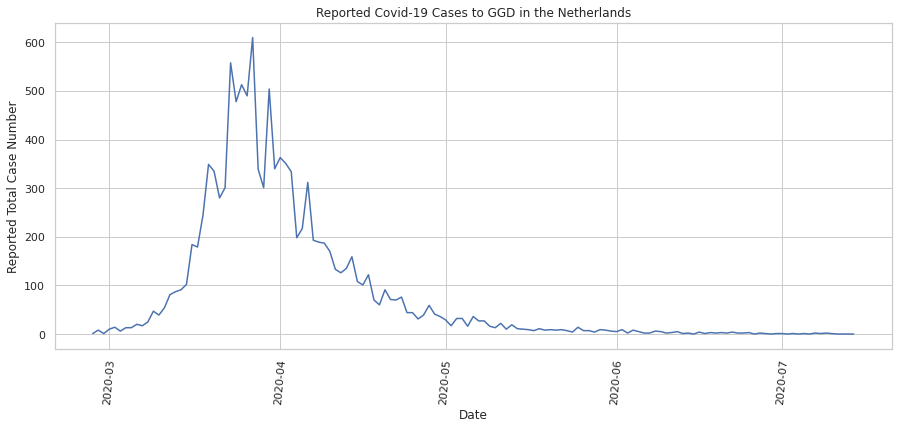

In [18]:
plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.lineplot(y=df1.Reported_Total_Cases, x=df1.date, data=df1, palette='rainbow', ci=None)
ax.set(xlabel='Date', ylabel='Reported Total Case Number', title='Reported Covid-19 Cases to GGD in the Netherlands')
plt.xticks(rotation=85)